In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler ,FunctionTransformer
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [2]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [3]:
print ("Unique values in Attrition ", df["Attrition"].unique())

Unique values in Attrition  ['Yes' 'No']


In [4]:
df["Attrition"] =df["Attrition"].astype(str).str.strip().str.capitalize()
print ("Unique values in Attrition ", df["Attrition"].unique())

Unique values in Attrition  ['Yes' 'No']


Rows after filtering valid Attrition :1470


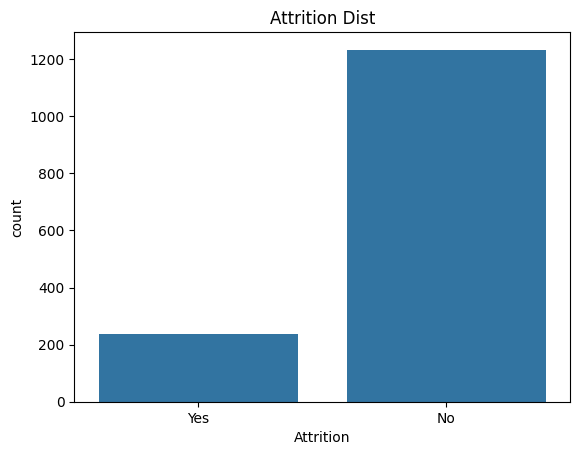

In [5]:
df_clean=df[df["Attrition"].isin(["Yes","No"])].copy()
print(f"Rows after filtering valid Attrition :{len(df_clean)}")
sns.countplot(x="Attrition",data=df_clean)
plt.title("Attrition Dist")
plt.show()

In [6]:
y=df_clean["Attrition"].map({"Yes":1,"No":0})
x=df_clean.drop(columns=["Attrition"])

In [7]:
df_clean.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
drop_cols=["EmployeeCount","Over18","StandardHours","EmployeeNumber"]
categorical_cols=["BusinessTravel","Department","EducationField","JobRole","MaritalStatus"]
numerical_cols=['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel',  'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [9]:
def binary_cleanup(data):
    data=data.copy()
    data["Gender"]=data["Gender"].map({"Male":1,"Female":0})
    data["OverTime"]=data["OverTime"].map({"Yes":1,"No":0})
    return data.drop(columns=drop_cols)
binary_transformer= FunctionTransformer(binary_cleanup)

In [10]:
num_pipeline=Pipeline([("imputer",SimpleImputer(strategy="median")),
                    ("scaler",StandardScaler())])


In [11]:
cat_pipeline=Pipeline([("imputer",SimpleImputer(strategy="most_frequent")),
                     ("encoder",OneHotEncoder(drop="first"))])

In [12]:
preprocessor=ColumnTransformer([("num",num_pipeline,numerical_cols),
                               ("cat",cat_pipeline,categorical_cols)],remainder="passthrough")

In [13]:
full_pipeline=Pipeline([("cleanup",binary_transformer),
                       ("preprocessing",preprocessor),
                       ("model", LogisticRegression(max_iter=1000))])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [22]:

model=full_pipeline.fit(X_train,y_train)
model

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('cleanup',
                 FunctionTransformer(func=<function binary_cleanup at 0x000001B77296C900>)),
                ('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'Hou...
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'JobRole',
                                                   'MaritalStatus'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [16]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
print("\n Accutacy",accuracy_score(y_test,y_pred))
print("\n Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\n Classification Report:\n",classification_report(y_test,y_pred))


 Accutacy 0.8877551020408163

 Confusion Matrix:
 [[244  11]
 [ 22  17]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       255
           1       0.61      0.44      0.51        39

    accuracy                           0.89       294
   macro avg       0.76      0.70      0.72       294
weighted avg       0.88      0.89      0.88       294



In [18]:
import joblib
import pandas as pd

In [23]:
joblib.dump(model,"attrition.joblib")
print("Model Saved as attrition.joblib")

Model Saved as attrition.joblib


In [26]:
import pandas as pd

# Load the trained pipeline
model = joblib.load("attrition.joblib")

# Create a sample input matching the original training feature columns
sample = pd.DataFrame([{
    'Age': 35,
    'DailyRate': 800,
    'DistanceFromHome': 10,
    'Education': 3,
    'EnvironmentSatisfaction': 3,
    'Gender': 'Male',
    'HourlyRate': 60,
    'JobInvolvement': 3,
    'JobLevel': 2,
    'JobSatisfaction': 3,
    'MonthlyIncome': 5000,
    'MonthlyRate': 15000,
    'NumCompaniesWorked': 2,
    'OverTime': 'Yes',
    'PercentSalaryHike': 15,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 3,
    'StockOptionLevel': 1,
    'TotalWorkingYears': 8,
    'TrainingTimesLastYear': 3,
    'WorkLifeBalance': 3,
    'YearsAtCompany': 4,
    'YearsInCurrentRole': 2,
    'YearsSinceLastPromotion': 1,
    'YearsWithCurrManager': 2,
    'BusinessTravel': 'Travel_Rarely',
    'Department': 'Research & Development',
    'EducationField': 'Life Sciences',
    'JobRole': 'Research Scientist',
    'MaritalStatus': 'Single',
    'EmployeeCount': 1,
    'Over18': 'Y',
    'StandardHours': 80,
    'EmployeeNumber': 12345
}])

prediction = model.predict(sample)[0]
print(prediction)
label = "Yes (Will Leave)" if prediction == 1 else "No (Will Stay)"
print("Prediction:", label)

0
Prediction: No (Will Stay)
